   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

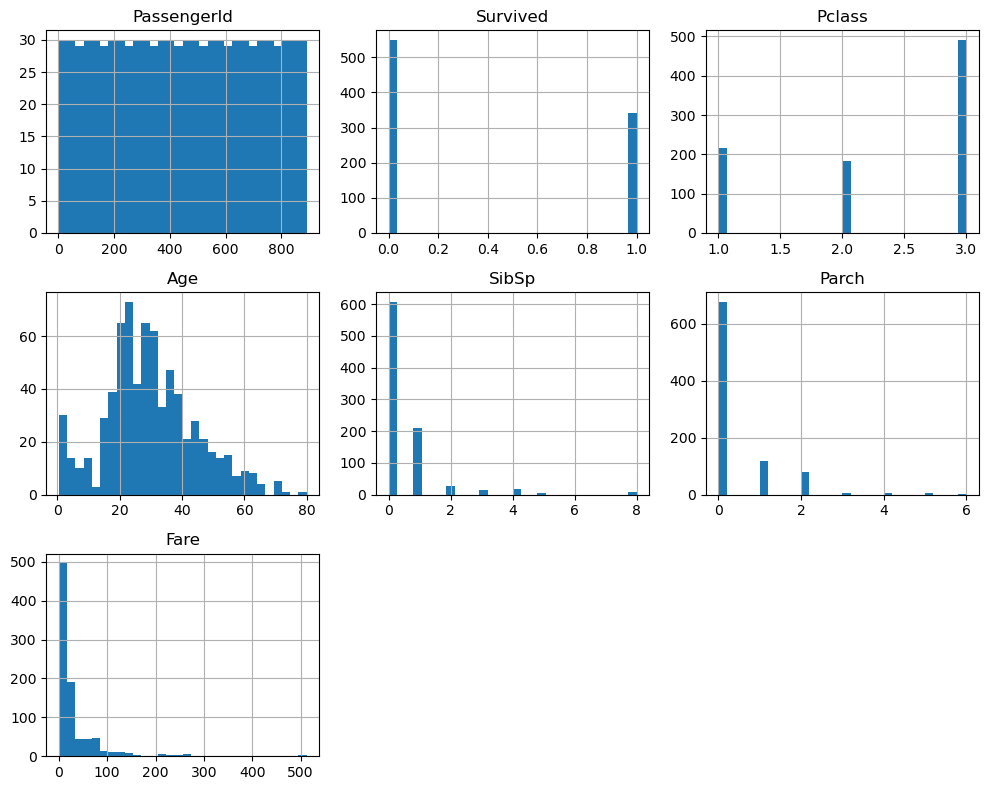

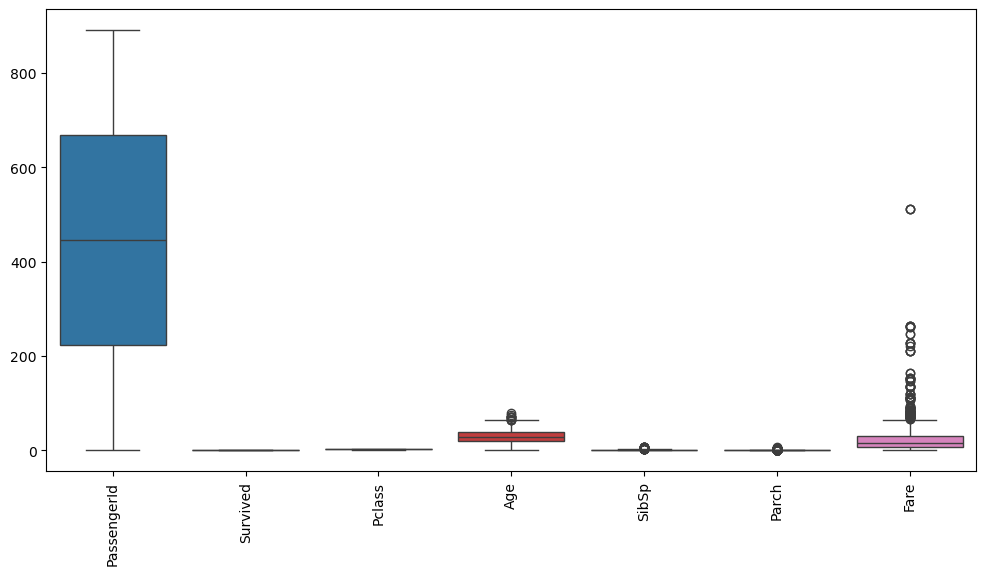

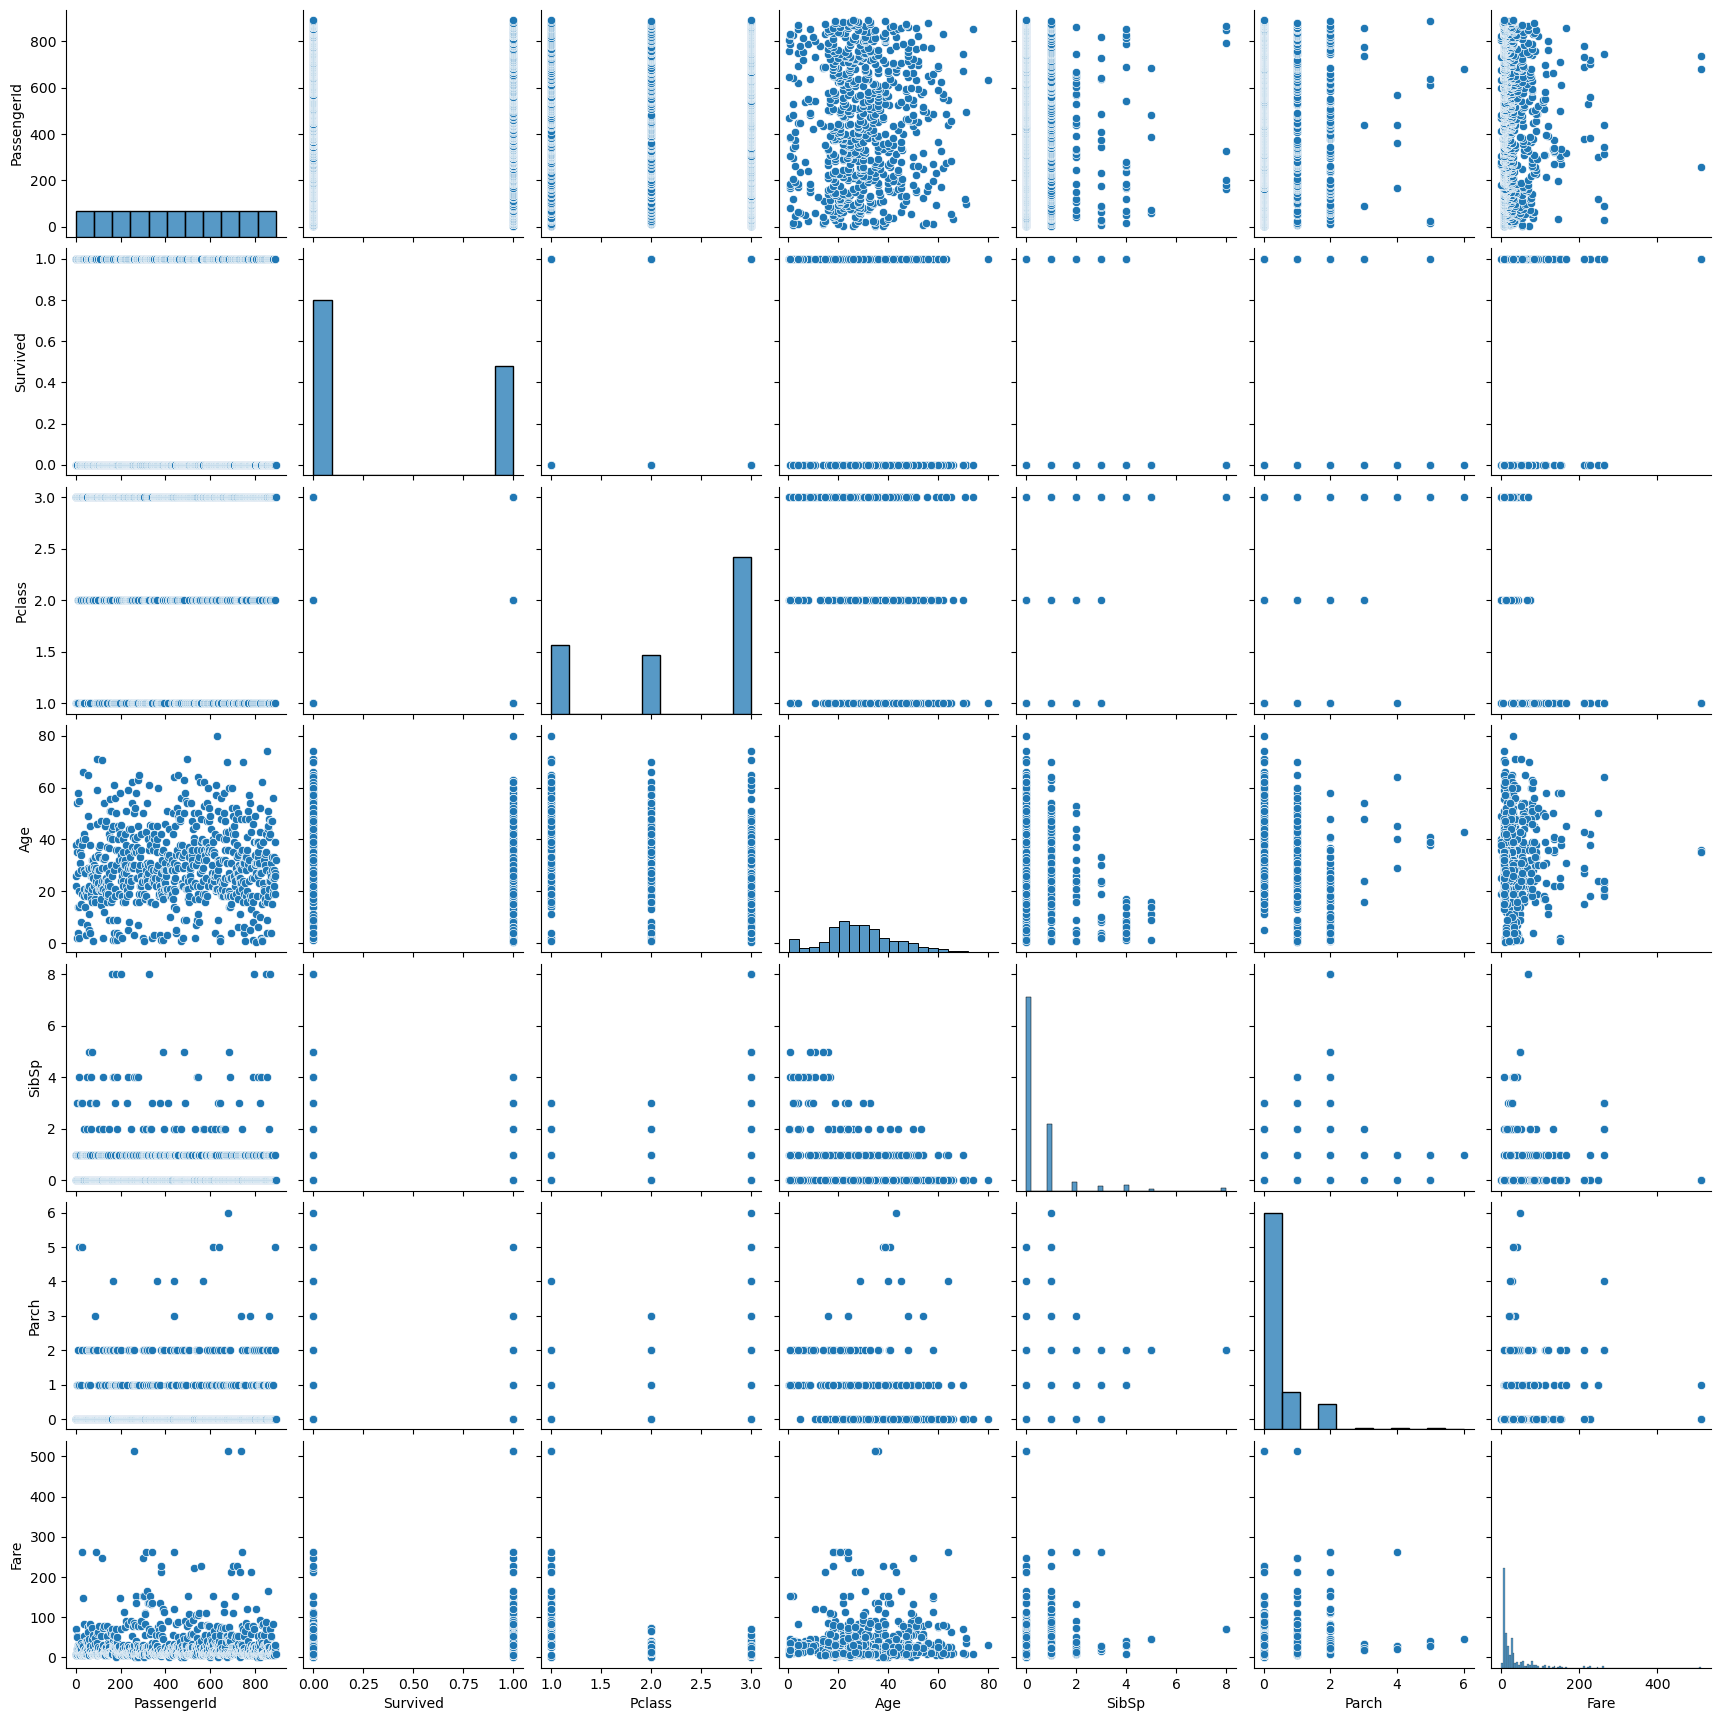

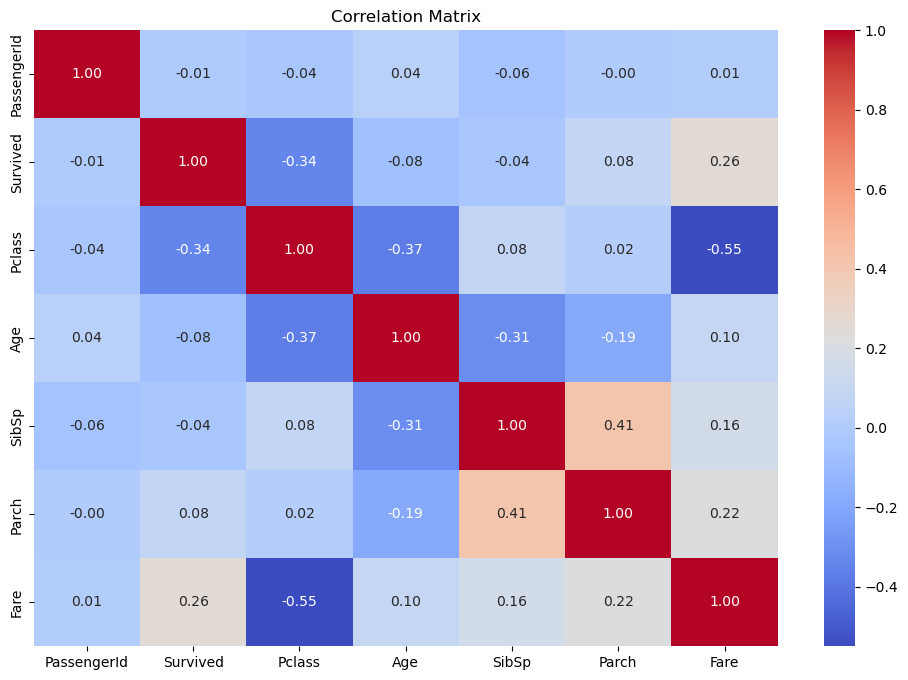

In [1]:
!pip install --upgrade seaborn pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Load the Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\Logistic Regression 1\Titanic_test.csv")
df = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\Logistic Regression 1\Titanic_train.csv")
# Display the first few rows of the dataframe
print(df.head())
#Examine the Features, Their Types, and Summary Statistics
# Display the data types of each feature
print(df.dtypes)

# Display summary statistics for numerical features
print(df.describe())

# Display basic information about the dataframe
print(df.info())
# Create Visualizations
#Histograms
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()
#Box Plots
# Plot box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate feature names if needed
plt.show()
#Pair Plots
# Plot pair plots
sns.pairplot(df)
plt.show()
#Analyze Patterns or Correlations
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [3]:
#Data Preprocessing
#Handle Missing Values
#Identify Missing Values
# Check for missing values in the dataset
print(df.isnull().sum())

#Imputation
from sklearn.impute import SimpleImputer

# Create imputer objects
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Apply imputation to categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

#Encode Categorical Variables
#One-Hot Encoding
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids multicollinearity

#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns (if necessary)
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load and preprocess your dataset
df = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\Logistic Regression 1\Titanic_train.csv")

# Drop irrelevant columns
df = df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])

#Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Encode Categorical Variables
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns (if necessary)
for column in ['Sex','Embarked']:
    df[column] = label_encoder.fit_transform(df[column])

# Adjust the column names according to your dataset
X = df.drop(columns=['Survived'])  # Feature matrix (excluding the target column)
y = df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[137  20]
 [ 30  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



Accuracy: 0.81
Precision: 0.80
Recall: 0.73
F1-Score: 0.76
ROC-AUC Score: 0.88


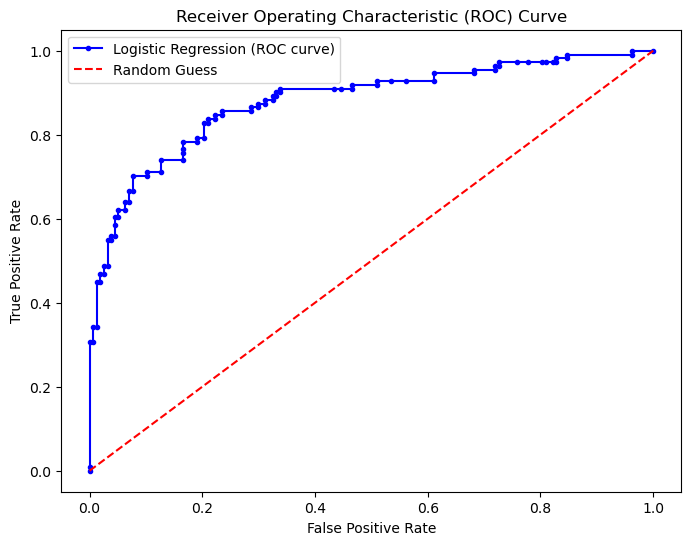

In [6]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the test data
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', color='b', label='Logistic Regression (ROC curve)')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [7]:
import numpy as np
import statsmodels.api as sm

# Extract coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Exponentiate coefficients to get odds ratios
})

# Sort the DataFrame by the absolute value of the coefficient
coeff_df['Absolute Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

print(coeff_df)

# Add an intercept term to the feature matrix
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
model_sm = sm.Logit(y_train, X_train_sm).fit()

# Print the summary of the model
print(model_sm.summary())


    Feature  Coefficient  Odds Ratio  Absolute Coefficient
1       Sex    -2.479991    0.083744              2.479991
0    Pclass    -0.892563    0.409605              0.892563
6  Embarked    -0.292095    0.746698              0.292095
3     SibSp    -0.264375    0.767686              0.264375
4     Parch    -0.089003    0.914843              0.089003
2       Age    -0.032587    0.967939              0.032587
5      Fare     0.002752    1.002756              0.002752
Optimization terminated successfully.
         Current function value: 0.451414
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.3154
Time:                        09

In [4]:
!pip install streamlit
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle
import numpy as np
import pickle
# Load the trained model
# Replace 'logistic_regression_model.pkl' with the path to your saved model file
with open(r"E:\New folder\DS Incomplete Assignments\Logistic Regression 1\Titanic_train.csv", 'rb') as file:
    model = pickle.load(LogisticRegression)

# Define the feature names based on your trained model
# Replace these with the actual feature names used in your model
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  # Update with your feature names

# Function to make predictions
def predict(features):
    # Convert features to a DataFrame for prediction
    df = pd.DataFrame([features], columns=feature_names)
    # Predict the probability of the positive class
    probability = model.predict_proba(df)[:, 1]
    return probability

# Streamlit app
def main():
    st.title('Logistic Regression Prediction App')

    # Create user inputs
    st.sidebar.header('User Input Parameters')

    inputs = []
    for feature in feature_names:
        value = st.sidebar.slider(feature, min_value=0, max_value=100, value=50)  # Adjust sliders as needed
        inputs.append(value)

    # Show input values
    st.write('User Input:', inputs)

    # Make prediction
    if st.button('Predict'):
        probability = predict(inputs)
        st.write(f'Probability of Positive Class: {probability[0]:.2f}')

if __name__ == "__main__":
    main()


TypeError: file must have 'read' and 'readline' attributes